### Binary Classification and Logistic Model

In this first topic, we will cover the basics of binary classification and the logistic model. We will focus on understanding how the logit function is defined, how the conditional probabilities are modeled, and how these probabilities are used to make classification decisions.

#### Binary Classification

In binary classification problems, the goal is to assign a label $y$ to a set of features $\mathbf{x}$. The labels $y$ can take one of two values: $+1$ or $-1$. The features $\mathbf{x}$ are a vector of dimension $M$, i.e., $\mathbf{x} \in \mathbb{R}^M$.

#### Logistic Model

Logistic regression is a discriminative model used for binary classification problems. The main idea is to model the conditional probability of the labels given the features using the logistic function.

##### Logit Function

The logit function is defined in terms of the true conditional probabilities. For a feature vector $\mathbf{x}$, the logit function is:
$$
\text{logit}(\mathbf{x}) = \ln \left( \frac{P(y = +1 | \mathbf{x})}{P(y = -1 | \mathbf{x})} \right)
$$

Classification is performed by examining the sign of the logit function:
$$
\hat{y} = \begin{cases} 
+1 & \text{if } \text{logit}(\mathbf{x}) \geq 0 \\
-1 & \text{if } \text{logit}(\mathbf{x}) < 0
\end{cases}
$$

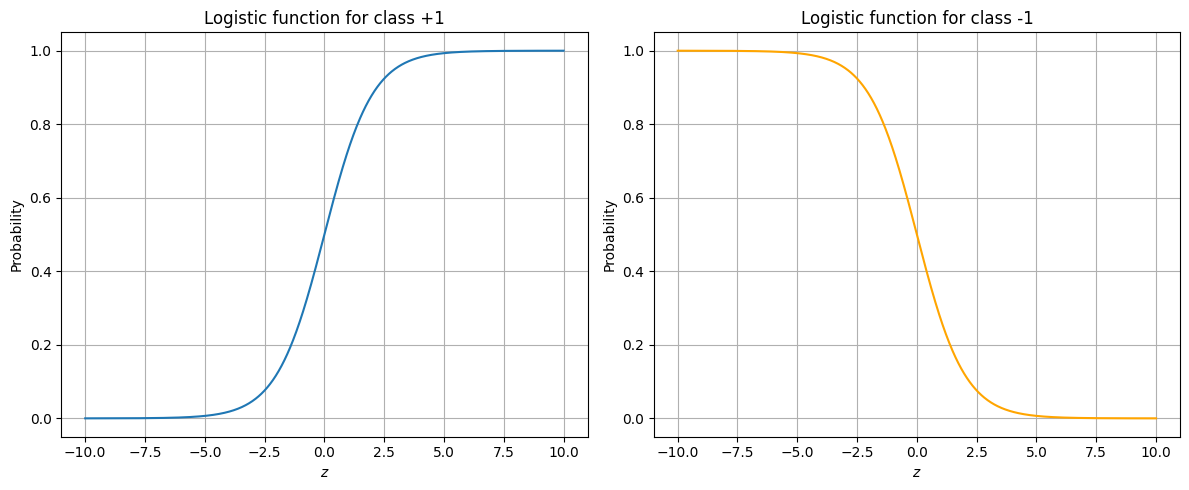

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the logistic function for class +1 and -1
def logistic_function_positive(z):
    return 1 / (1 + np.exp(-z))

def logistic_function_negative(z):
    return 1 / (1 + np.exp(z))

# Generate a range of values for z
z = np.linspace(-10, 10, 1000)

# Compute the logistic function values for both classes
logistic_values_positive = logistic_function_positive(z)
logistic_values_negative = logistic_function_negative(z)

# Create the plots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 5), dpi=100)

# Plot for class +1
ax1.plot(z, logistic_values_positive, label='$P(y=+1 | \mathbf{x}) = \sigma(z)$')
ax1.set_title('Logistic function for class +1')
ax1.set_xlabel('$z$')
ax1.set_ylabel(r'Probability')
ax1.grid(True)

# Plot for class -1
ax2.plot(z, logistic_values_negative, label='$P(y=-1 | \mathbf{x}) = \sigma(-z)$', color='orange')
ax2.set_title('Logistic function for class -1')
ax2.set_xlabel('$z$')
ax2.set_ylabel('Probability')
ax2.grid(True)

# Display the plots
plt.tight_layout()
plt.show()


##### Modeling Conditional Probabilities

In logistic regression, the conditional probabilities are modeled using the logistic (or sigmoid) function:

\begin{align}
P(y = +1 | \mathbf{x}) &=& \sigma(\mathbf{x}^T \mathbf{w} + w_0) &=& \frac{1}{1 + e^{-(\mathbf{x}^T \mathbf{w} + w_0)}} \\
P(y = -1 | \mathbf{x}) &=& 1 - P(y = +1 | \mathbf{x}) &=& \frac{1}{1 + e^{(\mathbf{x}^T \mathbf{w} + w_0)}}
\end{align}

Here, $\mathbf{w}$ is a weight vector and $w_0$ is a bias term.

##### Decision Function

The decision function is based on comparing the conditional probability $P(y = +1 | \mathbf{x})$ to 0.5. The decision is made as follows:
$$
\hat{y} = \begin{cases} 
+1 & \text{if } \mathbf{x}^T \mathbf{w} + w_0 \geq 0 \\
-1 & \text{if } \mathbf{x}^T \mathbf{w} + w_0 < 0
\end{cases}
$$

This decision rule is equivalent to evaluating the sign of $\mathbf{x}^T \mathbf{w} + w_0$.

### Logistic Empirical Risk

In this section, we will discuss the concept of logistic empirical risk and how it is used in the context of logistic regression. We will cover how to estimate the parameters of the logistic regression model using empirical risk minimization and the methods used to solve this optimization problem.

#### Empirical Risk Minimization

To train a logistic regression model, we need to estimate the parameters $\mathbf{w}$ and $w_0$ that best fit our training data. This is achieved by minimizing the empirical risk, which is an approximation of the expected risk over the training data. Given $N$ training samples $\{ (\mathbf{x}^{(n)}, y^{(n)}) \}$, where $y^{(n)} \in \{ +1, -1 \}$ is the label associated with the $n$-th feature vector $\mathbf{x}^{(n)} \in \mathbb{R}^M$, the empirical risk for logistic regression is defined as:

$$
(\mathbf{w}^*, w_0^*) = \arg \min_{\mathbf{w}, w_0} \left( \frac{1}{N} \sum_{n=1}^N \ln \left( 1 + e^{-y^{(n)} (\mathbf{x}^{(n)T} \mathbf{w} + w_0)} \right) \right)
$$

This objective function represents the average of the logistic loss over all training samples. The logistic loss for a single training example $(\mathbf{x}^{(n)}, y^{(n)})$ is given by:

$$
L(y^{(n)}, \mathbf{x}^{(n)T} \mathbf{w} + w_0) = \ln \left( 1 + e^{-y^{(n)} (\mathbf{x}^{(n)T} \mathbf{w} + w_0)} \right)
$$

#### Stochastic Gradient Descent

One of the most common methods for minimizing the empirical risk in logistic regression is stochastic gradient descent (SGD). In SGD, the model parameters are updated iteratively using the gradient of the loss function with respect to the parameters. The update rule for the parameters $\mathbf{w}$ and $w_0$ at the $t$-th iteration is given by:

\begin{align}
\mathbf{w}_{t+1} &=& \mathbf{w}_t - \eta \nabla_{\mathbf{w}} L(y^{(n)}, \mathbf{x}^{(n)T} \mathbf{w}_t + w_0) \\
w_0^{(t+1)} &=& w_0^{(t)} - \eta \frac{\partial}{\partial w_0} L(y^{(n)}, \mathbf{x}^{(n)T} \mathbf{w}_t + w_0)
\end{align}

where $\eta$ is the learning rate, and $\nabla_{\mathbf{w}} L$ and $\frac{\partial}{\partial w_0} L$ are the gradients of the loss function with respect to $\mathbf{w}$ and $w_0$, respectively. These gradients are computed as follows:

\begin{align}
\nabla_{\mathbf{w}} L &=& -y^{(n)} \mathbf{x}^{(n)} \left( 1 - \sigma(y^{(n)} (\mathbf{x}^{(n)T} \mathbf{w} + w_0)) \right) \\
\frac{\partial}{\partial w_0} L &=& -y^{(n)} \left( 1 - \sigma(y^{(n)} (\mathbf{x}^{(n)T} \mathbf{w} + w_0)) \right)
\end{align}

where $\sigma(z)$ is the sigmoid function defined as:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

#### Regularization

To prevent overfitting and improve the generalization of the logistic regression model, regularization can be added to the empirical risk minimization problem. Two common types of regularization are $\ell_1$ (Lasso) and $\ell_2$ (Ridge) regularization. The regularized empirical risk for logistic regression is given by:

$$
P(\mathbf{w}) = \alpha \|\mathbf{w}\|_1 + \rho \|\mathbf{w}\|_2^2 + \frac{1}{N} \sum_{n=1}^N \ln \left( 1 + e^{-y^{(n)} (\mathbf{x}^{(n)T} \mathbf{w} + w_0)} \right)
$$

where $\alpha$ and $\rho$ are regularization parameters controlling the strength of $\ell_1$ and $\ell_2$ regularization, respectively.

The update rules for SGD with regularization are modified as follows:

For $\ell_2$ regularization:
$$
\mathbf{w}_{t+1} = (1 - 2\eta\rho) \mathbf{w}_t - \eta \nabla_{\mathbf{w}} L(y^{(n)}, \mathbf{x}^{(n)T} \mathbf{w}_t + w_0)
$$

For $\ell_1$ regularization, the update involves a proximal operator for the $\ell_1$ term.

#### Example: Stochastic Gradient Descent for Logistic Regression

Let's illustrate the use of stochastic gradient descent for logistic regression with an example.

This code trains a logistic regression model using stochastic gradient descent. It initializes the weights and bias to zero, and iteratively updates them based on the gradient of the logistic loss function. The final weights and bias are used to make predictions on new data points.

In [1]:
import numpy as np

# Training data
X_train = np.array([[0.5, 1.5], [1.0, 1.0], [1.5, 0.5], [2.0, 1.0]])
y_train = np.array([1, -1, -1, 1])

# Parameters
learning_rate = 0.1
num_iterations = 1000

# Initialize weights and bias
w = np.zeros(X_train.shape[1])
w_0 = 0

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Training using SGD
for i in range(num_iterations):
    for x, y in zip(X_train, y_train):
        z = np.dot(x, w) + w_0
        gradient_w = -y * x * (1 - sigmoid(y * z))
        gradient_w_0 = -y * (1 - sigmoid(y * z))
        w = w - learning_rate * gradient_w
        w_0 = w_0 - learning_rate * gradient_w_0

print("Weights:", w)
print("Bias:", w_0)

# Prediction function
def predict(X, w, w_0):
    return np.sign(np.dot(X, w) + w_0)

# Prediction for a new data point
X_new = np.array([1.2, 0.8])
prediction = predict(X_new, w, w_0)
print(f'Prediction for the point {X_new}: {prediction}')

Weights: [2.38973313 7.2151867 ]
Bias: -10.306572272765951
Prediction for the point [1.2 0.8]: -1.0
